# Мультиклассовая классификация с использованием Logistic Regression

## Построение модели распознавания цифр

The University of California Irvines' 

Мы будем использовать набор данных, встроенный в Scikit  [Optical Recognition of Handwritten Digits](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) Калифорнийского университета в Ирвайне, содержащий почти 1800 рукописных цифр. Каждая цифра представлена массивом чисел 8 х 8 от 0 до 16, причем чем больше число, тем более темные пикселы оно означает.
Мы будем использовать логистическую регрессию для построения прогнозов. 

In [1]:
from sklearn import datasets
 
digits = datasets.load_digits()
print('digits.images: ' + str(digits.images.shape))
print('digits.target: ' + str(digits.target.shape))

digits.images: (1797, 8, 8)
digits.target: (1797,)


Первая цифра в числовом выражении выглядит так: 

In [2]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

А вот это как видит наши глаза:

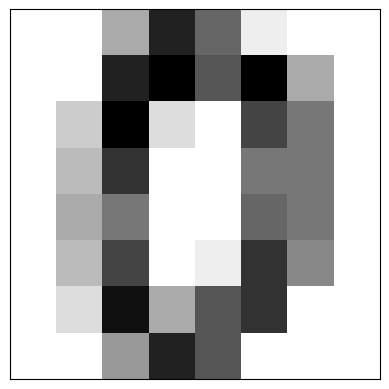

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

Очевидно, что это 0, но вы можете убедиться в этом по его метке (label)

In [4]:
digits.target[0]

0

Здесь показаны первые 50 цифр из набора данных:

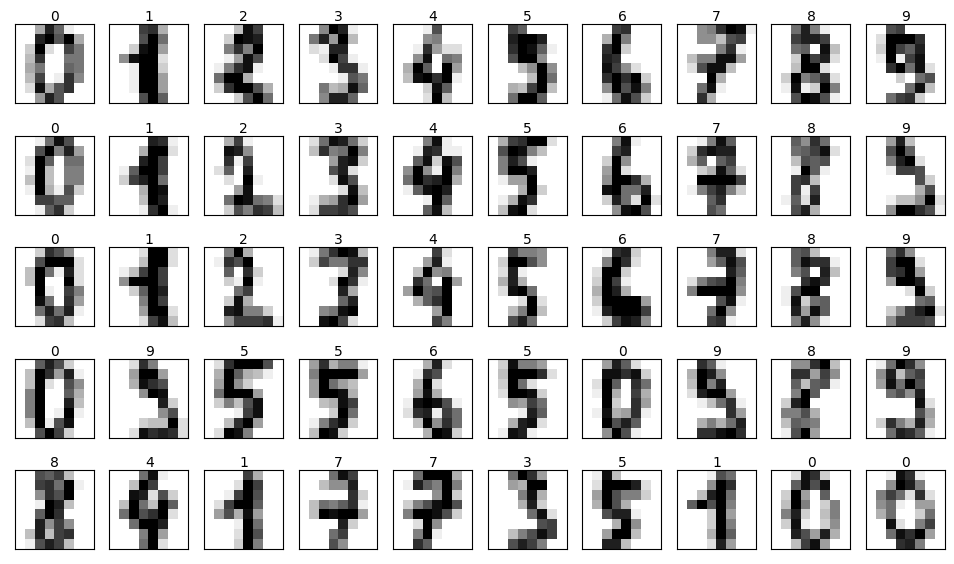

In [5]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})
 
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

Классификационные модели лучше работают с сбалансированными наборами данных. Постройте график распределения образцов:

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

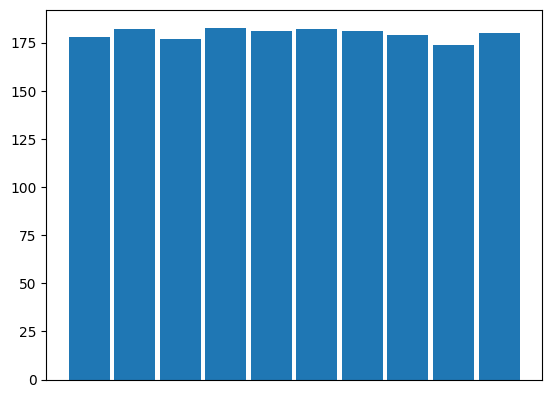

In [6]:
plt.xticks([])
plt.hist(digits.target, rwidth=0.9)

Набор данных довольно хорошо сбалансирован, поэтому давайте разделим данные и обучим модель логистической регрессии.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
 
model = LogisticRegression(max_iter=5000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

Для количественной оценки точности модели используйте метод score:

In [9]:
model.score(x_test, y_test)

0.9583333333333334

Используйте матрицу ошибок, чтобы увидеть, как модель работает на тестовом наборе данных:

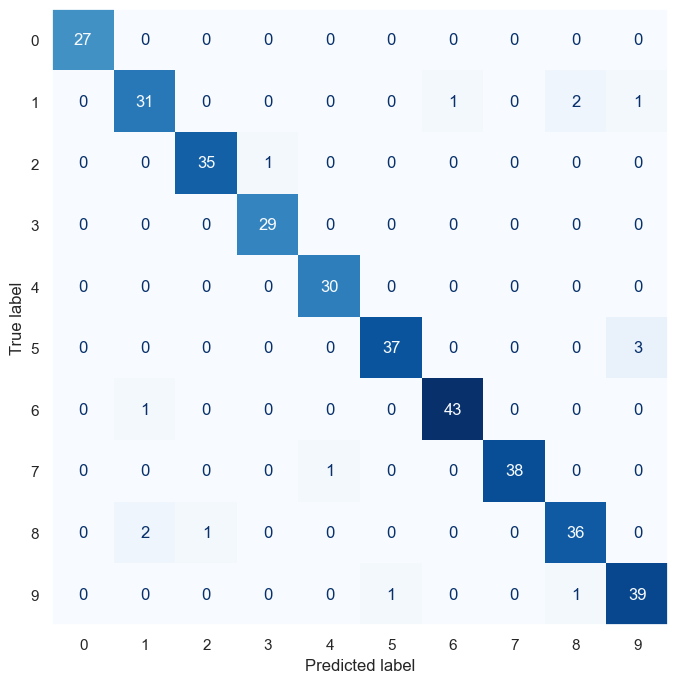

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cmd
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(8, 8))
ax.grid(False)
cmd.from_estimator(model, x_test, y_test, cmap='Blues', colorbar=False, ax=ax)

Полученный результат дает обнадеживающую картину: большие числа и темные цвета вдоль диагонали и маленькие числа и светлые цвета вне диагонали. В идеальной модели все нули были бы вне диагонали, но, конечно, идеальных моделей не существует.

Выберите одну из цифр из набора данных и отрисуйте ее, чтобы увидеть, как она выглядит:

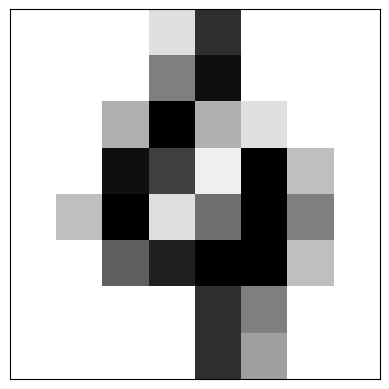

In [11]:
sns.reset_orig() # Undo sns.set()
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[100], cmap=plt.cm.gray_r)

Передайте его модели и посмотрите, какую цифру предсказывает модель.

In [12]:
model.predict([digits.data[100]])[0]

4

Какие вероятности предсказывает модель для каждой возможной цифры?

In [13]:
model.predict_proba([digits.data[100]])

array([[6.17683478e-11, 4.80417800e-09, 9.21739400e-21, 3.43060591e-22,
        9.99999988e-01, 1.05815140e-15, 7.35781097e-09, 1.52390584e-10,
        2.67603901e-12, 5.19312797e-22]])

Какова вероятность того, что цифра равна 4?

In [14]:
model.predict_proba([digits.data[100]])[0][4]

0.999999987621175

При использовании бинарной классификации predict_proba возвращает две вероятности: одну для отрицательного класса и одну для положительного. При мультиклассовой классификации predict_proba возвращает вероятности для каждого возможного класса. Это позволяет оценить уверенность модели в прогнозе, возвращаемом функцией predict. 

predict возвращает класс, которому присвоена наибольшая вероятность.